# Predicting Loan Approval

Redmund Nacario<br/>
Data Scientist Candidate

www.linkedin.com/in/redmund-nacario

# i. Summary of methodology

1. The data were explored and preprocessed:
<br/>
<br/>
A. Dependent data is imbalanced.
<br/>
B. Categorical values are converted to numeric
<br/>
C. Feature selection was done through backward Elimination. This is based on Hypothesis Testing which rejects features with P-value greater than 0.05.
<br/>
<br/>
2. Whole data was splitted to training and testing data randomly.
<br/>
<br/>
3. Logistic Regression and Random Forest were used.
<br/>
<br/>
4. In each models stated, imbalance dataset, oversampled minority class, and undersampled majority class were tested. 
<br/>
<br/>
5. Accuracy score, recall score, precision score, and f1 score were used in accuracy measurement.


# ii. Results Summary

1. Number of features were narrowed from 22 to 8.<br/>
>'checking_status',
'duration',
'purpose',
'credit_amount',
'savings_status',
'installment_commitment',
'personal_status',
'own_telephone'

2. Models with oversampling and undersampling performed better than the imbalanced dataset.<br/>
3. Random forest performs better in imbalance dataset setting with 45.7% F1 score.<br/>
4. Logistic regression in oversampled minority class setting performs the best compared to all with:<br/>
><strong>70.6% Accuracy score, 69.6% Recall score, 51.6% Precision Score, and 59.3% F1 score.</strong><br/>

Import the important libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1. Load Data

Open the local file data, print the first 5 rows, & display the columns

In [3]:
data_df = pd.read_csv('credit_data_track2_part_2_1.csv')
data_df.head()

,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,asnm,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted,gender
0,1,<0DM,6,Critical_acct_other_credits_existing,radio/television,1169.0,Unknown_or_no_savings_acct,>7yrs,4,male_single,...,193,none,own,2,skilled_employee/official,1,yes,yes,0,male
1,2,0_to_200DM,48,Existing_credits_paid_till_now,radio/television,5951.0,<100DM,1_to_4yrs,2,female_divorced/separated/married,...,424,none,own,1,skilled_employee/official,1,none,yes,1,female
2,3,None,12,Critical_acct_other_credits_existing,education,2096.0,<100DM,4_to_7yrs,2,male_single,...,73,none,own,1,unskilled_resident,2,none,yes,0,male
3,4,<0DM,42,Existing_credits_paid_till_now,furniture/equipment,7882.0,<100DM,4_to_7yrs,2,male_single,...,33,none,for_free,1,skilled_employee/official,2,none,yes,0,male
4,5,<0DM,24,Delay_in_past,new_car,4870.0,<100DM,1_to_4yrs,3,male_single,...,145,none,for_free,2,skilled_employee/official,2,none,yes,1,male


# Part 2 & 3. Explore the data and Data Wrangling

1. Check the data types of each columns

In [4]:
print(data_df.dtypes)

Unnamed: 0                  int64
checking_status            object
duration                    int64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment      int64
personal_status            object
other_parties              object
residence_since             int64
property_magnitude         object
age                         int64
asnm                        int64
other_payment_plans        object
housing                    object
existing_credits            int64
job                        object
num_dependents              int64
own_telephone              object
foreign_worker             object
accepted                    int64
gender                     object
dtype: object


2. Check if there is missing data

"None" or "none" in own_telephone, other_payment_plans, other_parties, checking_status are considered as valid data

In [7]:
print("\n","Sum of null values in each feature:","\n")
print(data_df.isnull().sum())
columns_X = list(data_df.columns)
columns_X = columns_X[1:]


 Sum of null values in each feature: 

Unnamed: 0                0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             1
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
asnm                      0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
accepted                  0
gender                    0
dtype: int64


Null is only present once in credit amount column. We can drop that row where null occured

In [9]:
data_df = data_df.dropna(axis = 0)


3. Check the unique values per column if it is a Categorical values. If not show min, avg, & max of the column data

In [10]:
data_df = data_df[columns_X]

for ctr, i in enumerate(data_df.columns):
    print("\n", ctr, i,"-",data_df[i].dtype,"\n")
    unq_col = data_df[i].unique().tolist()
    
    if data_df[i].dtypes == np.float or (data_df[i].dtypes == np.int and len(unq_col) > 10):
        print ("\t Min:",data_df[i].min(),", Avg:",data_df[i].mean(),", Max:", data_df[i].max())
    else:   
        for ctr1, j in enumerate(unq_col):
            print("\t",ctr1 + 1, j)
        


 0 checking_status - object 

	 1 <0DM
	 2 0_to_200DM
	 3 None
	 4 >200DM

 1 duration - int64 

	 Min: 4 , Avg: 20.91191191191191 , Max: 72

 2 credit_history - object 

	 1 Critical_acct_other_credits_existing
	 2 Existing_credits_paid_till_now
	 3 Delay_in_past
	 4 No_credits_taken_or_all_paid
	 5 All_credits_paid_duly

 3 purpose - object 

	 1 radio/television
	 2 education
	 3 furniture/equipment
	 4 new_car
	 5 used_car
	 6 business
	 7 domestic_appliances
	 8 repairs
	 9 other
	 10 retraining

 4 credit_amount - float64 

	 Min: 250.0 , Avg: 3273.2362362362364 , Max: 18424.0

 5 savings_status - object 

	 1 Unknown_or_no_savings_acct
	 2 <100DM
	 3 500_to_1000DM
	 4 >1000DM
	 5 100_to_500DM

 6 employment - object 

	 1 >7yrs
	 2 1_to_4yrs
	 3 4_to_7yrs
	 4 unemployed
	 5 <1yr

 7 installment_commitment - int64 

	 1 4
	 2 2
	 3 3
	 4 1

 8 personal_status - object 

	 1 male_single
	 2 female_divorced/separated/married
	 3 male_divorced/separated
	 4 male_married/widowed

 9

4. Convert to categorical values to numeric

In [11]:
def transform_categories_to_numeric(categories):
    le = preprocessing.LabelEncoder()
    le.fit(categories)
    return le

le_converter = {}
for ctr, i in enumerate(columns_X):
    if data_df[i].dtypes == "object":
        le_converter[i] = transform_categories_to_numeric(data_df[i])
        data_df[i] = le_converter[i].transform(data_df[i])
        
    

4. Determine the % of dependent variable

999 299 700
Positive examples = 299
Negative examples = 700
Proportion of positive to negative examples = 42.71%


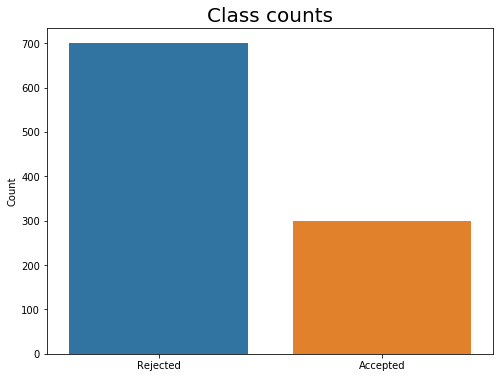

In [12]:
total_shape = np.shape(data_df)[0]
accepted = np.shape(data_df[data_df["accepted"] == 1])[0]
rejected = total_shape - accepted
print (total_shape,accepted, rejected)

print(f"Positive examples = {accepted}")
print(f"Negative examples = {rejected}")
print(f"Proportion of positive to negative examples = {(accepted / rejected) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(data_df["accepted"])
plt.xticks((0, 1), ["Rejected", "Accepted"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

The data given is imabalanced in favor to rejected classes. This might affect the performance of the model to be biased to the majority class

5. Visualize the scatterplots of independent variables


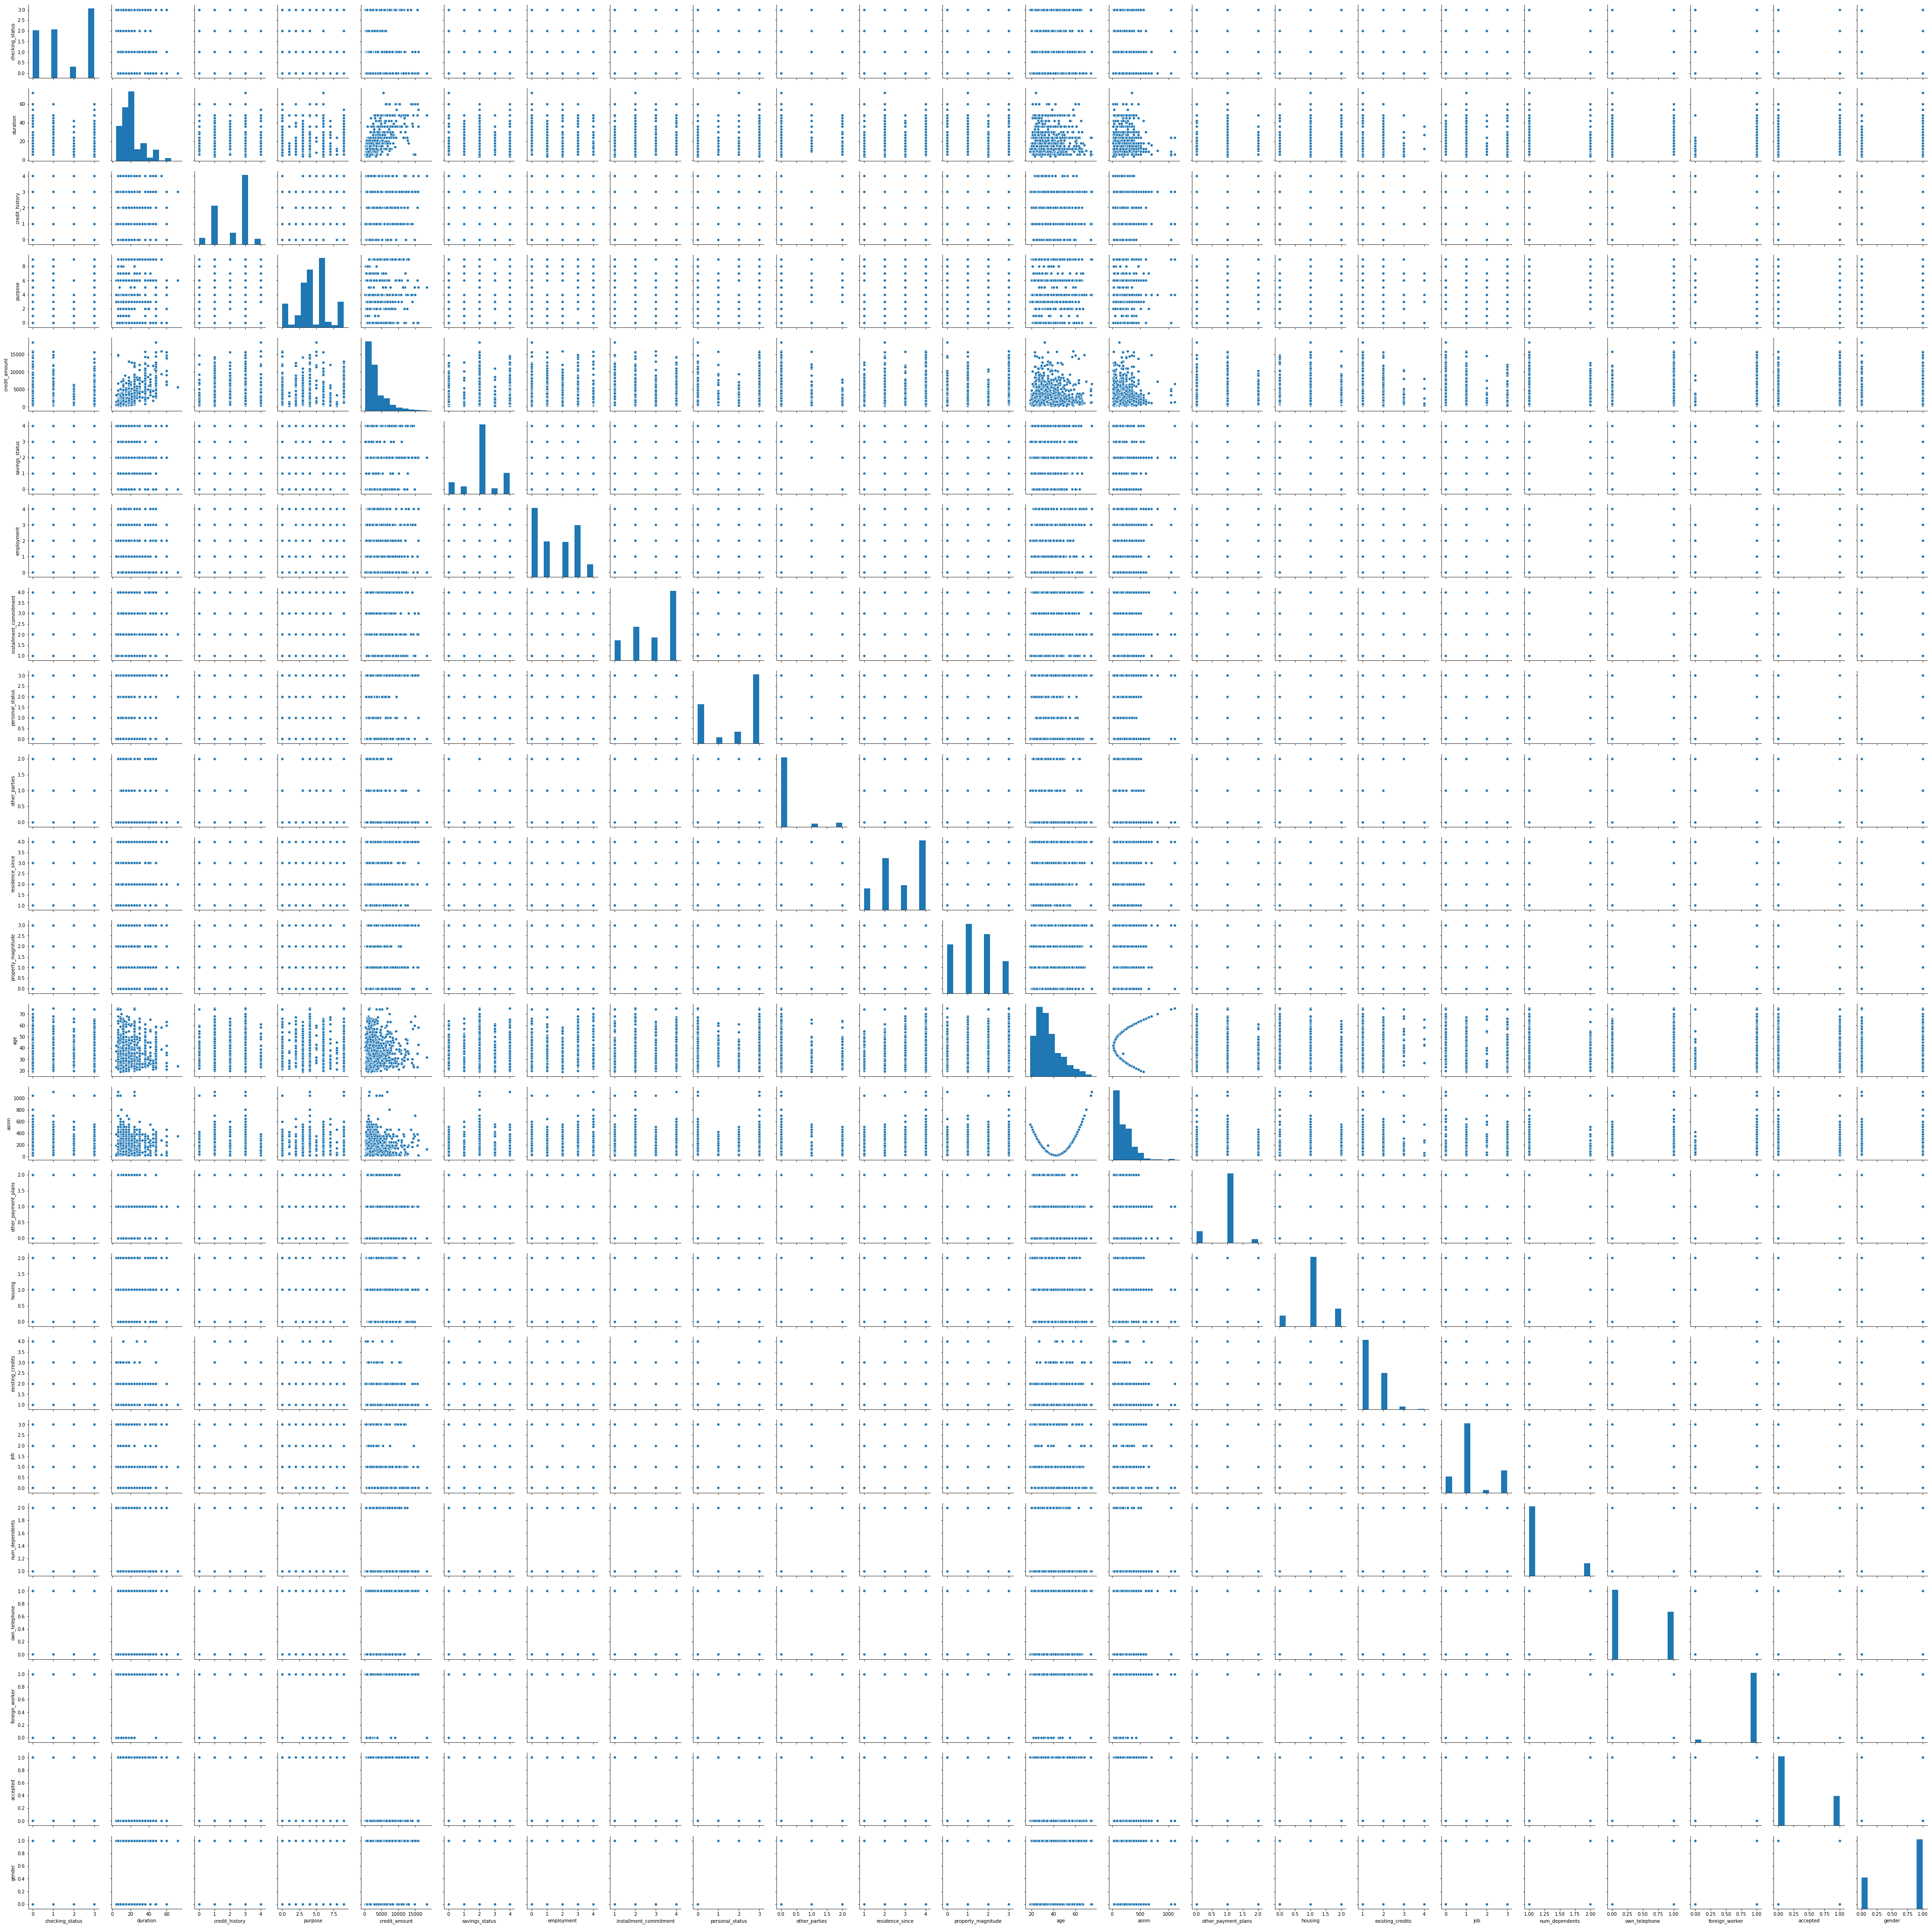

In [16]:
sns.pairplot(data_df[columns_X])

6. View correlation plots

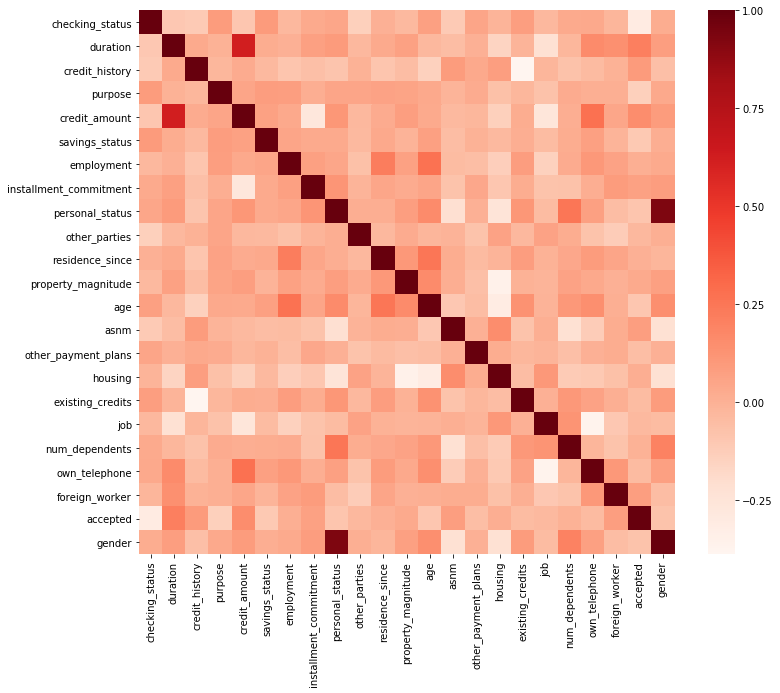

In [17]:
plt.figure(figsize=(12,10))
cor = data_df[columns_X].corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

Observation for numerical features:
>1. Credit amount is positively correlated to duration.
2. Credit amount is negatively correlated with installment commitment.


7. Simplify the credit_history classes<br/><br/>

><strong>A. Not fully paid</strong><br/>
Critical_acct_other_credits_existing<br/>
Delay_in_past<br/><br/>

><strong>B. Fully paid</strong><br/>
No_credits_taken_or_all_paid<br/>
All_credits_paid_duly<br/>
Existing_credits_paid_till_now<br/>

In [19]:
# Simplify credit history classes
data_df['credit_history'][data_df['credit_history'].isin(['Critical_acct_other_credits_existing',\
                                        'Delay_in_past'])] = "Not fully paid"
data_df['credit_history'][data_df['credit_history'].isin(['No_credits_taken_or_all_paid',\
                                        'All_credits_paid_duly',\
                                        'Existing_credits_paid_till_now'])] = "Fully paid" 


/Users/rnacario/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rnacario/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Part 4. Model Preparation
 

1. Set up the testing and training data

In [21]:
data_df_X = data_df.drop("accepted", axis=1)

X_train, X_test, y_train, y_test = train_test_split(data_df_X,\
                                                    data_df["accepted"], test_size=0.30, random_state=30)

In [22]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(699, 22)
(300, 22)
(699,)
(300,)


# Part 5. Feature Selection through Backward Elimination - Hypothesis testing

In [ ]:
#Backward Elimination
cols = list( data_df_X.columns)
data_df_y = data_df['accepted']

pmax = 1

while (len(cols)>0):
    p = []
    X_1 = data_df_X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(data_df_y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

In [31]:
X_train = X_train[selected_features_BE]
X_test = X_test[selected_features_BE]
print(np.shape(X_train))
print(np.shape(X_test))

(699, 8)
(300, 8)


# Part 6. Modeling

## 1. Imbalance dataset

### A. Logistic Regresion

In [32]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
print ("Accuracy score", accuracy_score(y_test, lr_pred))
print ("Recall score", recall_score(y_test, lr_pred))
print ("Precision score", precision_score(y_test, lr_pred))
print ("F1 score", f1_score(y_test, lr_pred))

# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

Accuracy score 0.7433333333333333
Recall score 0.2608695652173913
Precision score 0.7272727272727273
F1 score 0.38399999999999995


0    267
1     33
Name: 0, dtype: int64

### B. Random Forest

In [33]:
rfc = RandomForestClassifier(n_estimators=11).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

# Checking accuracy
print ("Accuracy score", accuracy_score(y_test, rfc_pred))
print ("Recall score", recall_score(y_test, rfc_pred))
print ("Precision score", precision_score(y_test, rfc_pred))
print ("F1 score", f1_score(y_test, rfc_pred))

# Checking unique values
predictions = pd.DataFrame(rfc_pred)
predictions[0].value_counts()

Accuracy score 0.7466666666666667
Recall score 0.34782608695652173
Precision score 0.6666666666666666
F1 score 0.4571428571428571


0    252
1     48
Name: 0, dtype: int64

## 2. Oversampling the minority class

In [34]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
X_rejected = X[X.accepted == 0]
X_accepted = X[X.accepted == 1]

# oversample minority
X_accepted_oversampled = resample(X_accepted,
                          replace=True, # sample with replacement
                          n_samples=len(X_rejected), # match number in majority class
                          random_state=30) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([X_rejected, X_accepted_oversampled])

# check new class counts
upsampled.accepted.value_counts()

1    492
0    492
Name: accepted, dtype: int64

### A. Logistic Regresion

In [35]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.accepted
X_train = upsampled.drop('accepted', axis=1)

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
print ("Accuracy score", accuracy_score(y_test, lr_pred))
print ("Recall score", recall_score(y_test, lr_pred))
print ("Precision score", precision_score(y_test, lr_pred))
print ("F1 score", f1_score(y_test, lr_pred))

# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

Accuracy score 0.7066666666666667
Recall score 0.6956521739130435
Precision score 0.5161290322580645
F1 score 0.5925925925925926


0    176
1    124
Name: 0, dtype: int64

### B. Random Forest

In [36]:
rfc = RandomForestClassifier(n_estimators=11).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

# Checking accuracy
print ("Accuracy score", accuracy_score(y_test, rfc_pred))
print ("Recall score", recall_score(y_test, rfc_pred))
print ("Precision score", precision_score(y_test, rfc_pred))
print ("F1 score", f1_score(y_test, rfc_pred))

# Checking unique values
predictions = pd.DataFrame(rfc_pred)
predictions[0].value_counts()

Accuracy score 0.74
Recall score 0.43478260869565216
Precision score 0.6060606060606061
F1 score 0.5063291139240507


0    234
1     66
Name: 0, dtype: int64

## 3. Undersampling the majority class

In [37]:
# downsample majority
X_rejected_downsampled = resample(X_rejected,
                                replace = False, # sample without replacement
                                n_samples = len(X_accepted), # match minority n
                                random_state = 30) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([X_rejected_downsampled, X_accepted])

# checking counts
downsampled.accepted.value_counts()

1    207
0    207
Name: accepted, dtype: int64

### A. Logistic Regression

In [38]:
# trying logistic regression again with the balanced dataset
y_train = downsampled.accepted
X_train = downsampled.drop('accepted', axis=1)

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
print ("Accuracy score", accuracy_score(y_test, lr_pred))
print ("Recall score", recall_score(y_test, lr_pred))
print ("Precision score", precision_score(y_test, lr_pred))
print ("F1 score", f1_score(y_test, lr_pred))

# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

Accuracy score 0.69
Recall score 0.6956521739130435
Precision score 0.49612403100775193
F1 score 0.5791855203619909


0    171
1    129
Name: 0, dtype: int64

### B. Random Forest

In [39]:
rfc = RandomForestClassifier(n_estimators=11).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

# Checking accuracy
print ("Accuracy score", accuracy_score(y_test, rfc_pred))
print ("Recall score", recall_score(y_test, rfc_pred))
print ("Precision score", precision_score(y_test, rfc_pred))
print ("F1 score", f1_score(y_test, rfc_pred))

# Checking unique values
predictions = pd.DataFrame(rfc_pred)
predictions[0].value_counts()

Accuracy score 0.6966666666666667
Recall score 0.6847826086956522
Precision score 0.504
F1 score 0.5806451612903226


0    175
1    125
Name: 0, dtype: int64